In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from group_opt import new_group_matrix

import textwrap


In [2]:
votes = pd.read_csv('2021_11_Presidencial/output/2021_11_Presidencial_VOTOS.csv')
electors = pd.read_csv('2021_11_Presidencial/output/2021_11_Presidencial_ELECTORES.csv')
# read pickles
with open('2021_11_Presidencial/output/CANDIDATOS.pickle', 'rb') as f:
    candidatos = pickle.load(f)
with open('2021_11_Presidencial/output/GRUPOS.pickle', 'rb') as f:
    grupos = pickle.load(f)

llave_mesa = ['CIRCUNSCRIPCION ELECTORAL', 'MESA']
df = votes.merge(electors[llave_mesa + grupos], on = llave_mesa, how = 'inner')

# Mesas

Group aggregation example


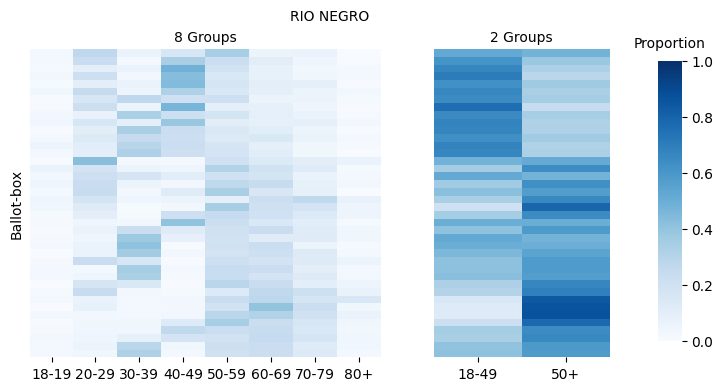

In [3]:
from matplotlib import colors

def agg_heatmap(df_circ, cmap):

    fig, ax = plt.subplots(1, 2, figsize=(8,4), width_ratios = [2,1])  # Adjust the figsize as needed
    circ = df_circ['CIRCUNSCRIPCION ELECTORAL'].unique()[0]
    fig.suptitle(circ, fontsize = 10)
    cbar_ax = fig.add_axes([.91, .15, .03, .7])
    # max_val = np.max(df_circ[grupos][df_circ['LOCAL'].isin(locales)].T/np.sum(df_circ[grupos][df_circ['LOCAL'].isin(locales)].T))
    # cbar_ax = fig.add_axes([1.01, .3, .03, .4])
    b = df_circ[grupos].values
    b_proportions = b/np.sum(b, axis = 1)[:,None]
    im = sns.heatmap(b_proportions, ax=ax[0], xticklabels=True, yticklabels = False,
                cbar = True, cbar_ax = cbar_ax, cmap = cmap, vmin = 0, vmax = 1)
    # ax title
    ax[0].set_title('8 Groups', fontsize = 10)
    # set x ticks as grupos
    ax[0].set_xticklabels(grupos)
    # y axis name
    ax[0].set_ylabel('Ballot-box')

    # cbar title on top
    cbar_ax.set_title('Proportion', pad = 10, fontsize = 10)

    group_combination = [[0,1,2,3],[4,5,6,7]]
    new_b, group_names = new_group_matrix(b, group_combination)

    # df_circ[group_names] = new_b
    new_b_proportions = new_b/np.sum(new_b, axis = 1)[:,None]
    im = sns.heatmap(new_b_proportions, ax=ax[1], xticklabels=True, yticklabels = False,
                cbar = False, cmap = cmap, vmin = 0, vmax = 1)
    ax[1].set_xticklabels(group_names)
    ax[1].set_title('2 Groups', fontsize = 10)
    # cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    # fig.colorbar(im, cax = cbar_ax, shrink = 0.8, pad =.01)
    # cbar = plt.colorbar(im, cax=cbar_ax)
    fig.subplots_adjust(right=0.85)
    # savefig
    plt.savefig('images/elections/group_aggregation.pdf')
    plt.show()


circ = 'RIO NEGRO'
df_circ = df[df['CIRCUNSCRIPCION ELECTORAL'] == circ]
agg_heatmap(df_circ, cmap = 'Blues')
# agg_heatmap(df_circ, cmap = 'cividis')


Presentación

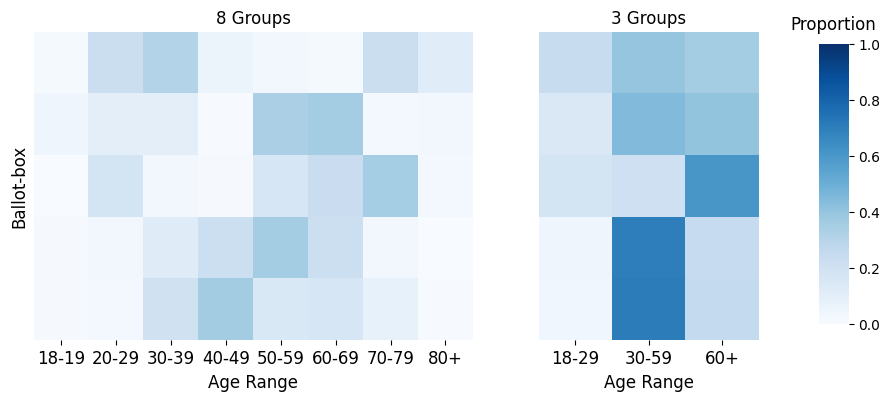

In [4]:
from matplotlib import colors

def agg_heatmap(df_circ, cmap):

    fig, ax = plt.subplots(1, 2, figsize=(10,4), width_ratios = [2,1])  # Adjust the figsize as needed
    circ = df_circ['CIRCUNSCRIPCION ELECTORAL'].unique()[0]
    # fig.suptitle(circ, fontsize = 10)
    cbar_ax = fig.add_axes([.91, .15, .03, .7])
    # max_val = np.max(df_circ[grupos][df_circ['LOCAL'].isin(locales)].T/np.sum(df_circ[grupos][df_circ['LOCAL'].isin(locales)].T))
    # cbar_ax = fig.add_axes([1.01, .3, .03, .4])
    b = df_circ[grupos].values
    b_proportions = b/np.sum(b, axis = 1)[:,None]
    im = sns.heatmap(b_proportions, ax=ax[0], xticklabels=True, yticklabels = False,
                cbar = True, cbar_ax = cbar_ax, cmap = cmap, vmin = 0, vmax = 1)
    # ax title
    ax[0].set_title('8 Groups', fontsize = 12)
    # set x ticks as grupos
    ax[0].set_xticklabels(grupos, fontsize = 12)
    # x label
    ax[0].set_xlabel('Age Range', fontsize = 12)
    # y axis name
    ax[0].set_ylabel('Ballot-box', fontsize = 12)

    # cbar title on top
    cbar_ax.set_title('Proportion', pad = 10, fontsize = 12)

    # group_combination = [[0,1,2,3],[4,5,6,7]]
    group_combination = [[0,1],[2,3,4],[5,6,7]]
    new_b, group_names = new_group_matrix(b, group_combination)

    # df_circ[group_names] = new_b
    new_b_proportions = new_b/np.sum(new_b, axis = 1)[:,None]
    im = sns.heatmap(new_b_proportions, ax=ax[1], xticklabels=True, yticklabels = False,
                cbar = False, cmap = cmap, vmin = 0, vmax = 1)
    ax[1].set_xticklabels(group_names, fontsize = 12)
    ax[1].set_xlabel('Age Range', fontsize = 12)
    ax[1].set_title('3 Groups', fontsize = 12)
    # cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    # fig.colorbar(im, cax = cbar_ax, shrink = 0.8, pad =.01)
    # cbar = plt.colorbar(im, cax=cbar_ax)
    fig.subplots_adjust(right=0.85)
    # savefig
    plt.savefig('images/presentacion/group_aggregation.pdf')
    plt.show()


circ = 'SALTOS DEL LAJA'
df_circ = df[df['CIRCUNSCRIPCION ELECTORAL'] == circ]
agg_heatmap(df_circ, cmap = 'Blues')
# agg_heatmap(df_circ, cmap = 'cividis')


Group distribution

In [3]:

# Assuming you have already defined 'locales', 'electors_providencia', and 'grupos'

def group_heatmap(df_circ, locales):

    fig, ax = plt.subplots(1, len(locales), figsize=(3*len(locales),3))  # Adjust the figsize as needed
    
    # max_val = np.max(df_circ[grupos][df_circ['LOCAL'].isin(locales)].T/np.sum(df_circ[grupos][df_circ['LOCAL'].isin(locales)].T))

    for i, l in enumerate(locales):
        sns.heatmap((df_circ[df_circ['LOCAL'] == l][grupos].T)/np.sum(df_circ[df_circ['LOCAL'] == l][grupos].T),
                    ax=ax[i], xticklabels=False, yticklabels = False, cmap='Blues', cbar=False, vmin = 0, vmax = 0.35)
        
        # print((df_circ[df_circ['LOCAL'] == l][grupos].T)/np.sum(df_circ[df_circ['LOCAL'] == l][grupos].T))
        if i == 0:
            ax[i].set_yticks(range(len(grupos)))
            ax[i].set_yticklabels(grupos, rotation=90)
            ax[i].set_ylabel('Groups')
            ax[i].tick_params(left = False)
        title_lines = textwrap.wrap(f'{l}', width=30)  # Adjust the width as needed
        title = '\n'.join(title_lines)
        
        ax[i].text(0.5, 1.08, title, transform=ax[i].transAxes, va='center', ha='center')
        ax[i].set_xlabel('')

    plt.tight_layout(w_pad = 0)
    plt.show()


In [22]:
from matplotlib import colors

def group_heatmap(df_circ, locales, cmap = 'Blues', trunc = .7):

    fig, ax = plt.subplots(2, int(len(locales)/2), figsize=(2*len(locales),5), sharey = True)
                            

    # max_val = np.max(df_circ[grupos][df_circ['LOCAL'].isin(locales)].T/np.sum(df_circ[grupos][df_circ['LOCAL'].isin(locales)].T))
    cbar_ax = fig.add_axes([1.01, .3, .03, .4])

    for i, l in enumerate(locales):
        index = i//int(len(locales)/2),i%int(len(locales)/2)
        group_proportion = df_circ[df_circ['LOCAL'] == l][grupos].T/np.sum(df_circ[df_circ['LOCAL'] == l][grupos].T)
        # group_proportion = group_proportion.values
        im = sns.heatmap(group_proportion, ax=ax[index], xticklabels=False, yticklabels = True,
                    cmap = cmap, cbar=True, cbar_ax = cbar_ax ,vmin = 0, vmax = trunc,
                    cbar_kws={"shrink": 0.3})
        # colorbar tick label
        if trunc < 1:
            n_trunc = int(trunc*10)
            cbar_ax.set_yticks([0.1*j for j in range(n_trunc+1)])
            cbar_ax.set_yticklabels([f'   {0.1*j:.1f}' for j in range(n_trunc)] + [f' > {0.1*n_trunc:.1f}'])
        # cbar title
        # cbar_ax.set_ylabel('Proportion', rotation=270, labelpad = 15)
        # cbar title onn top
        cbar_ax.set_title('Proportion', fontsize = 10, pad = 10)

        # print((df_circ[df_circ['LOCAL'] == l][grupos].T)/np.sum(df_circ[df_circ['LOCAL'] == l][grupos].T))
        if index[1] == 0:
            # ax[index].set_yticks(range(len(grupos)))
            # ax[index].set_yticklabels(grupos, rotation=90)
            ax[index].set_yticklabels(grupos)
            ax[index].set_ylabel('Age Range')
            ax[index].tick_params(left = True)
        else:
            # dont show ticks
            ax[index].tick_params(left = False)
        if index[0] == 1:
            ax[index].set_xlabel('Ballot-box')
        title_lines = textwrap.wrap(f'{l}', width=30)  # Adjust the width as needed
        title = '\n'.join(title_lines)
        
        ax[index].text(0.5, 1.08, title, transform=ax[index].transAxes, va='center', ha='center')
        ax[index].set_xlabel('')

    # WSPACE
    fig.subplots_adjust(wspace = 0.15)
    # put cbar closer
    fig.subplots_adjust(right=0.95)

    # plt.savefig(f'images/elections/group_distribution.pdf')
    # save fig
    fig.savefig(f'images/elections/group_distribution.pdf', bbox_inches='tight')
    # # Create the colorbar
    # cbar = plt.colorbar(im, cax=cbar_ax)

    # fig.colorbar(im, ax = ax, shrink = 0.8, pad =.01)
    # plt.tight_layout(w_pad = 0.4)
    plt.show()


119


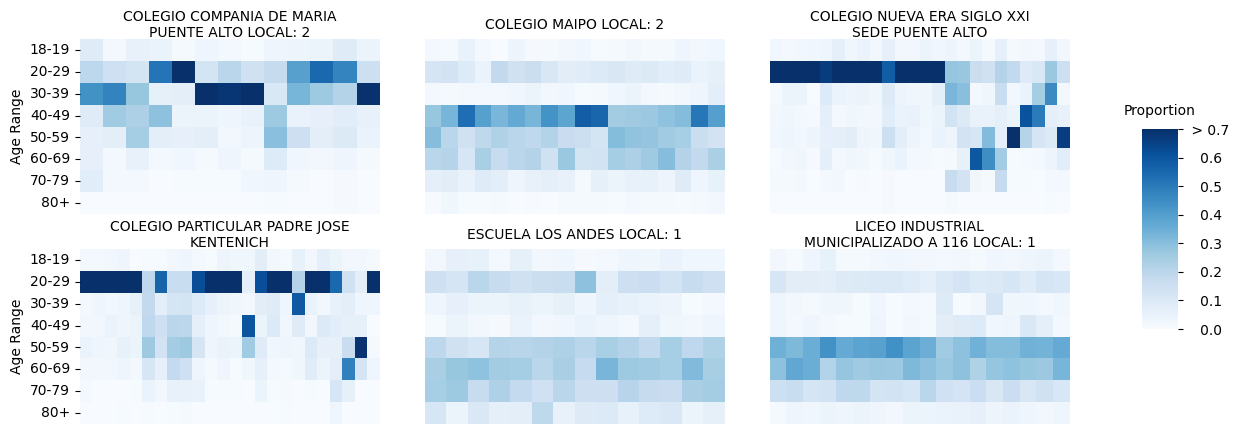

In [23]:
# seed = 30
seed  = 119
print(seed)
np.random.seed(seed)
circ = 'PUENTE ALTO'
electors_circ = electors[electors['CIRCUNSCRIPCION ELECTORAL'] == circ]
electors_circ = electors_circ[['LOCAL', 'MESA'] + grupos].sort_values(by='LOCAL')
locales = electors_circ['LOCAL'].unique()
# loc_used_1 = list(np.sort(np.random.choice(locales, 1, replace = False)))
# loc_used_2 = list(np.sort(['COLEGIO PARTICULAR PADRE JOSE KENTENICH', 'COLEGIO NUEVA ERA SIGLO XXI SEDE PUENTE ALTO', 'ESCUELA BASICA PADRE ALBERTO HURTADO', 
# 'LICEO INDUSTRIAL MUNICIPALIZADO A 116 LOCAL: 1', 'COLEGIO MAIPO LOCAL: 2',
# 'ESCUELA OSCAR BONILLA LOCAL: 1', 
# 'COLEGIO COMPANIA DE MARIA PUENTE ALTO LOCAL: 2']))
# loc_used = loc_used_1 + loc_used_2

loc_used = list(np.sort(['COLEGIO PARTICULAR PADRE JOSE KENTENICH', 'COLEGIO NUEVA ERA SIGLO XXI SEDE PUENTE ALTO', 
'LICEO INDUSTRIAL MUNICIPALIZADO A 116 LOCAL: 1', 'COLEGIO MAIPO LOCAL: 2',
'COLEGIO COMPANIA DE MARIA PUENTE ALTO LOCAL: 2', 'ESCUELA LOS ANDES LOCAL: 1']))
group_heatmap(electors_circ, loc_used, cmap = 'Blues')
# group_heatmap(electors_circ, loc_used, cmap = 'cividis', trunc = 1)

132


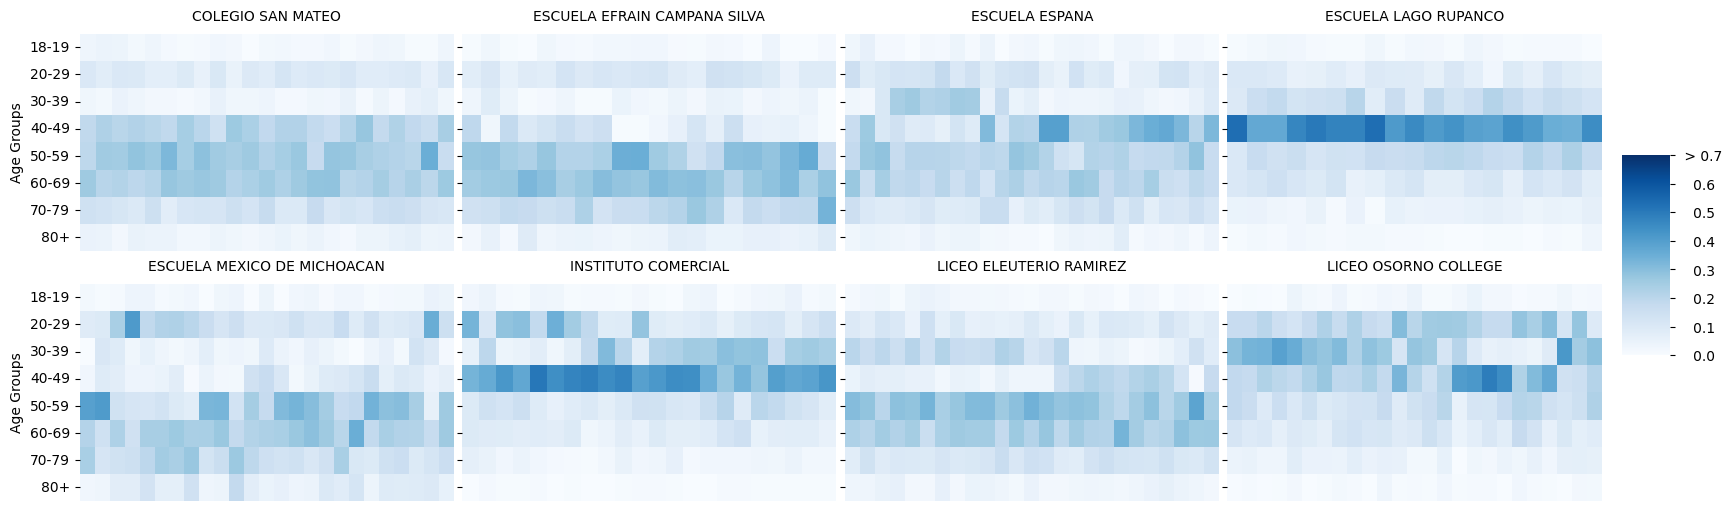

In [166]:
# seed = 30
seed +=1
print(seed)
np.random.seed(seed)
circ = 'OSORNO'
electors_circ = electors[electors['CIRCUNSCRIPCION ELECTORAL'] == circ]
electors_circ = electors_circ[['LOCAL', 'MESA'] + grupos].sort_values(by='LOCAL')
locales = electors_circ['LOCAL'].unique()
loc_used_1 = list(np.sort(np.random.choice(locales, 8, replace = False)))
# loc_used_2 = list(np.sort(['COLEGIO PARTICULAR PADRE JOSE KENTENICH', 'COLEGIO NUEVA ERA SIGLO XXI SEDE PUENTE ALTO', 'ESCUELA BASICA PADRE ALBERTO HURTADO', 
# 'LICEO INDUSTRIAL MUNICIPALIZADO A 116 LOCAL: 1', 'COLEGIO MAIPO LOCAL: 2']))
loc_used = loc_used_1 
group_heatmap(electors_circ, loc_used, cmap = 'Blues')
# group_heatmap(electors_circ, loc_used, cmap = 'cividis', trunc = 1)

### Presentación


119


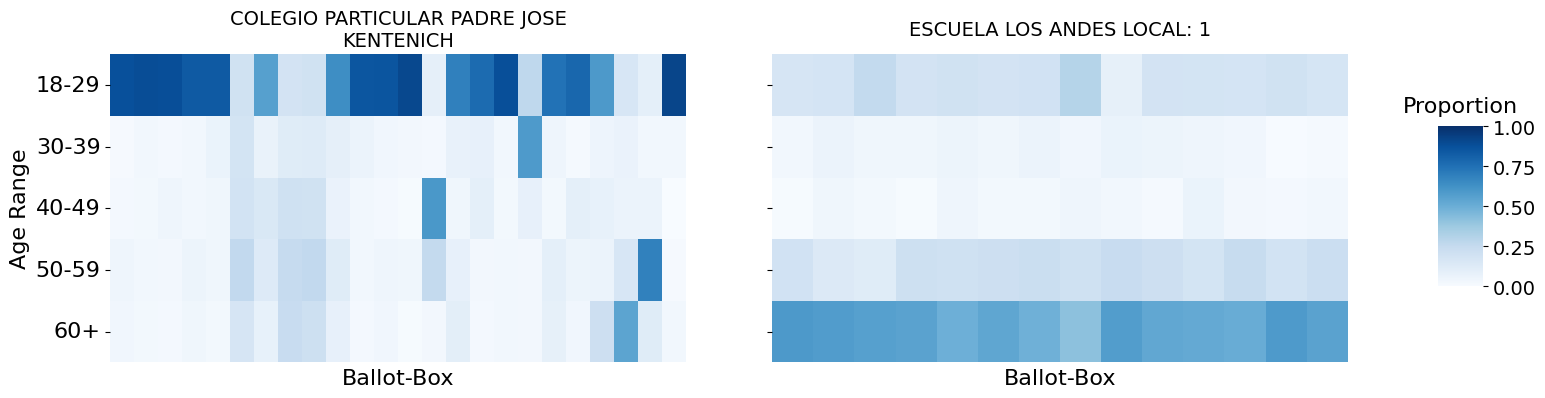

In [32]:
from matplotlib import colors

def group_heatmap(df_circ, locales, cmap = 'Blues', trunc = 1):

    b_ = df_circ[grupos].values
    b, new_groups = new_group_matrix(b_, [[0,1],[2],[3],[4],[5,6,7]])
    df_circ[new_groups] = b

    fig, ax = plt.subplots(1, 2, figsize=(15,4), sharey = True)
                            

    # max_val = np.max(df_circ[new_groups][df_circ['LOCAL'].isin(locales)].T/np.sum(df_circ[new_groups][df_circ['LOCAL'].isin(locales)].T))
    cbar_ax = fig.add_axes([1.01, .3, .03, .4])

    for i, l in enumerate(locales):
        index = i
        group_proportion = df_circ[df_circ['LOCAL'] == l][new_groups].T/np.sum(df_circ[df_circ['LOCAL'] == l][new_groups].T)
        # group_proportion = group_proportion.values
        im = sns.heatmap(group_proportion, ax=ax[index], xticklabels=False, yticklabels = True,
                    cmap = cmap, cbar=True, cbar_ax = cbar_ax ,vmin = 0, vmax = trunc,
                    cbar_kws={"shrink": 0.3})
        # colorbar tick label
        if trunc < 1:
            n_trunc = int(trunc*10)
            cbar_ax.set_yticks([0.1*j for j in range(n_trunc+1)])
            cbar_ax.set_yticklabels([f'   {0.1*j:.1f}' for j in range(n_trunc)] + [f' > {0.1*n_trunc:.1f}'])
        # cbar title
        # cbar_ax.set_ylabel('Proportion', rotation=270, labelpad = 15)
        # cbar title onn top
        cbar_ax.set_title('Proportion', fontsize = 16, pad = 10)
        # cbar tick size
        cbar_ax.tick_params(labelsize=14)

        # print((df_circ[df_circ['LOCAL'] == l][new_groups].T)/np.sum(df_circ[df_circ['LOCAL'] == l][new_groups].T))
   
            # ax[index].set_yticks(range(len(new_groups)))
            # ax[index].set_yticklabels(new_groups, rotation=90)
        ax[index].set_yticklabels(new_groups, fontsize = 16, rotation = 0)
        if index == 0: ax[index].set_ylabel('Age Range', fontsize = 16)
        ax[index].tick_params(left = True)

        ax[index].set_xlabel('Ballot-box', fontsize = 16)
        title_lines = textwrap.wrap(f'{l}', width=30)  # Adjust the width as needed
        title = '\n'.join(title_lines)
        
        ax[index].text(0.5, 1.08, title, transform=ax[index].transAxes, va='center', ha='center', fontsize = 14)
        ax[index].set_xlabel('Ballot-Box', fontsize = 16)

     

    # WSPACE
    fig.subplots_adjust(wspace = 0.15)
    # put cbar closer
    fig.subplots_adjust(right=0.95)

    # plt.savefig(f'images/elections/group_distribution.pdf')
    # save fig
    fig.savefig(f'images/presentacion/group_distribution.pdf', bbox_inches='tight')
    # # Create the colorbar
    # cbar = plt.colorbar(im, cax=cbar_ax)

    # fig.colorbar(im, ax = ax, shrink = 0.8, pad =.01)
    # plt.tight_layout(w_pad = 0.4)
    plt.show()

    # seed = 30
seed  = 119
print(seed)
np.random.seed(seed)
circ = 'PUENTE ALTO'
electors_circ = electors[electors['CIRCUNSCRIPCION ELECTORAL'] == circ]
electors_circ = electors_circ[['LOCAL', 'MESA'] + grupos].sort_values(by='LOCAL')
locales = electors_circ['LOCAL'].unique()
# loc_used_1 = list(np.sort(np.random.choice(locales, 1, replace = False)))
# loc_used_2 = list(np.sort(['COLEGIO PARTICULAR PADRE JOSE KENTENICH', 'COLEGIO NUEVA ERA SIGLO XXI SEDE PUENTE ALTO', 'ESCUELA BASICA PADRE ALBERTO HURTADO', 
# 'LICEO INDUSTRIAL MUNICIPALIZADO A 116 LOCAL: 1', 'COLEGIO MAIPO LOCAL: 2',
# 'ESCUELA OSCAR BONILLA LOCAL: 1', 
# 'COLEGIO COMPANIA DE MARIA PUENTE ALTO LOCAL: 2']))
# loc_used = loc_used_1 + loc_used_2

loc_used = list(np.sort(['COLEGIO PARTICULAR PADRE JOSE KENTENICH', 'ESCUELA LOS ANDES LOCAL: 1']))
group_heatmap(electors_circ, loc_used, cmap = 'Blues')
# group_heatmap(electors_circ, loc_used, cmap = 'cividis', trunc = 1)


# Otros gráficos


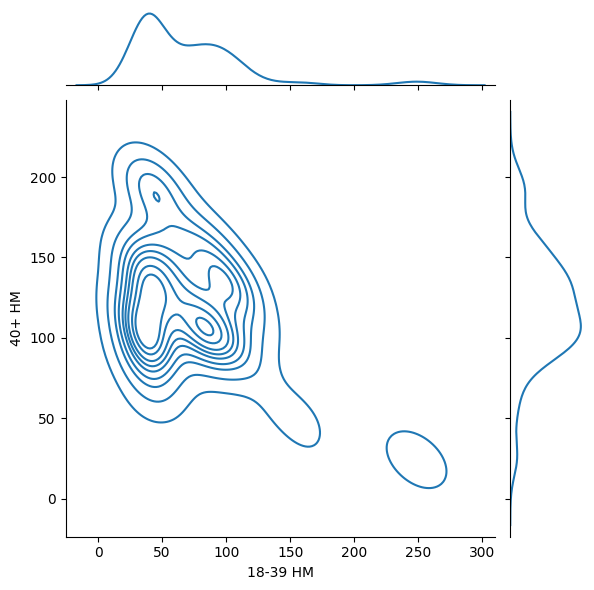

In [4]:
# Create a bivariate density plot using jointplot
sns.jointplot(x=grupos[0], y=grupos[1], data=electors_providencia, kind='kde')
plt.show()

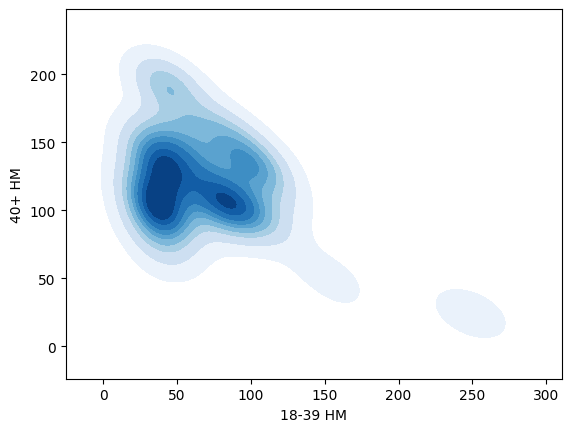

In [5]:
# Create a bivariate density plot using kdeplot
sns.kdeplot(data = electors_providencia, x = grupos[0], y = grupos[1], fill=True, cmap='Blues', thresh=0.05)

# Display the plot
plt.show()

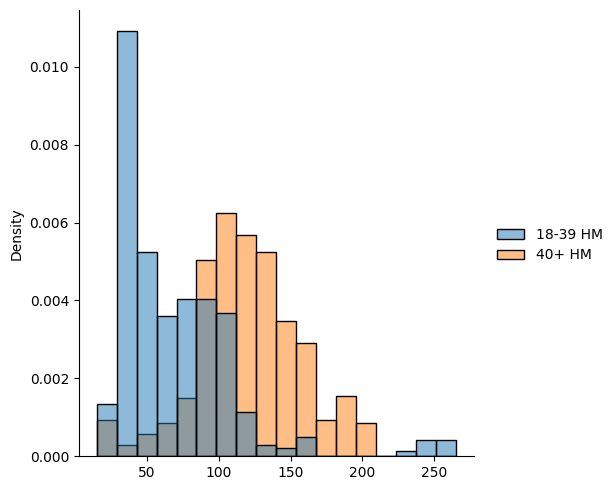

In [39]:
# show as frequency instead of count
sns.displot(electors_providencia[grupos], stat="density", line_kws={"color": "red", "lw": 2})
# sns.displot(electors_providencia[grupos[0]])

<Axes: ylabel='Count'>

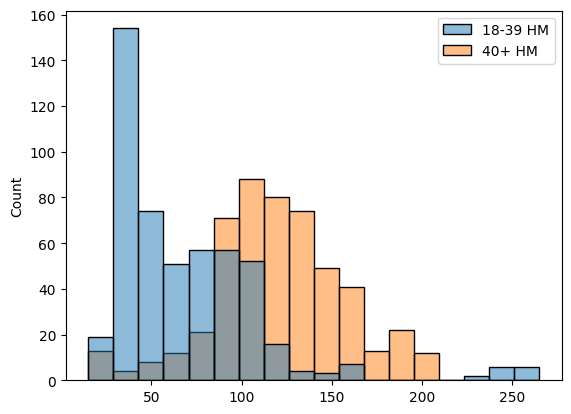

In [32]:
sns.histplot(electors_providencia[grupos])

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

# Assuming 'df' is your DataFrame with columns A, B, and C

# Extract data from DataFrame
data = electors_providencia[electors_providencia.columns[4:7]].values.T

# Create a 3D density plot
kde = gaussian_kde(data)
x, y, z = data
xi, yi = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
zi = zi.reshape(xi.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Set labels for axes
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Density')

# Display the plot
plt.show()

ValueError: points have dimension 2, dataset has dimension 3